# Question 1

In [1]:
import numpy as np
from numpy import genfromtxt

x = genfromtxt('problem_1_data.csv', delimiter=',')
x = np.reshape(x, (len(x), 1))

y = genfromtxt('problem_1_label.csv', delimiter=',')
y = np.reshape(y, (len(y), 1))


In [2]:
# Closed form solution
phi = np.hstack((x**2, x, np.ones((len(x), 1))))

w = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y)
print(f'Solution for a: {w[0]}')
print(f'Solution for b: {w[1]}')
print(f'Solution for c: {w[2]}')

Solution for a: [1.06623954]
Solution for b: [-0.58165109]
Solution for c: [4.01338366]


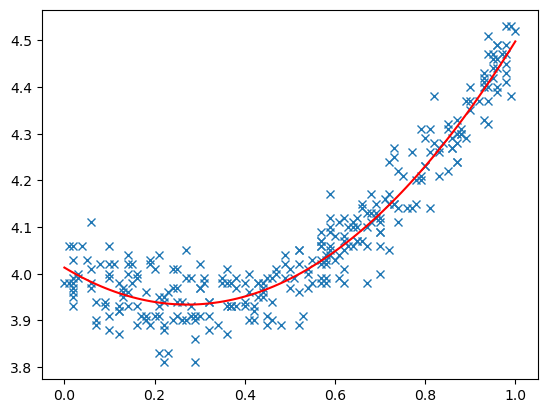

In [3]:
# Plot
import matplotlib.pyplot as plt

x_line = np.linspace(0, 1, 100)
y_line = w[0].item()*(x_line**2) + w[1].item()*x_line + w[2].item() 

plt.plot(x, y, 'x')
plt.plot(x_line, y_line, color='red')


plt.show()

# Question 2

In [11]:
import numpy as np
from numpy import genfromtxt

X = genfromtxt('problem_2_data.csv', delimiter=',')

y = genfromtxt('problem_2_label.csv', delimiter=',')
y = np.reshape(y, (len(y), 1))

In [12]:
# Splitting data
from sklearn.model_selection import train_test_split

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=0.5)

In [13]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Preproccess testing and validation data
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [14]:
# Define gradient descent and mse functions

# Use derivation from class slides
def f_prime(phi, w, y, n):
    return (2/n) * phi.T.dot(phi.dot(w) - y)

def mse(phi, w, y):
    return np.mean((phi.dot(w) - y)**2)  # Predicted - actual

def gradient_descent(phi, y, num_iterations, coef):
    n, m = phi.shape

    w = np.random.rand(m, 1)  # Generate initial w
    mse_list = []

    for i in range(num_iterations):
        w -= coef * f_prime(phi, w, y, n)
        mse_list.append(mse(phi, w, y))

    return w, mse_list

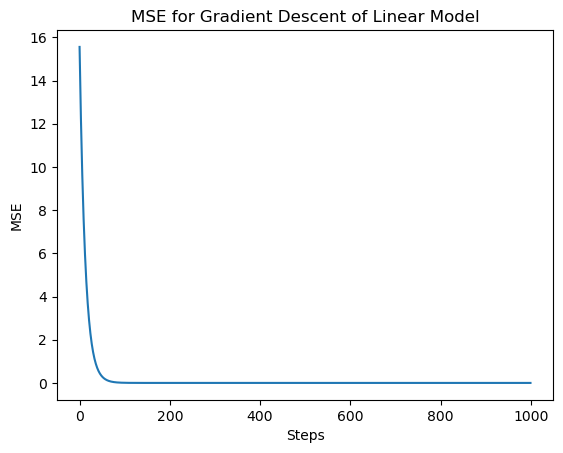

MSE of Linear Model using Training Data: 0.002380419167633558
MSE of Linear Model using Validation Data: 0.0026379808276905765
MSE of Linear Model using Testing Data: 0.002338691011993809


In [15]:
# Linear
import matplotlib.pyplot as plt 

phi_linear_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))

w, mse_list = gradient_descent(phi_linear_train, y_train, 1000, .02)

# Plot Gradient Descent
plt.plot(mse_list)
plt.title('MSE for Gradient Descent of Linear Model')
plt.xlabel('Steps')
plt.ylabel('MSE')
plt.show()

# Create feature maps for validation and testing
phi_linear_valid = np.hstack((X_val, np.ones((X_val.shape[0], 1))))
phi_linear_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

# MSE for training, validation, and testing
print(f'MSE of Linear Model using Training Data: {mse(phi_linear_train, w, y_train)}')
print(f'MSE of Linear Model using Validation Data: {mse(phi_linear_valid, w, y_val)}')
print(f'MSE of Linear Model using Testing Data: {mse(phi_linear_test, w, y_test)}')

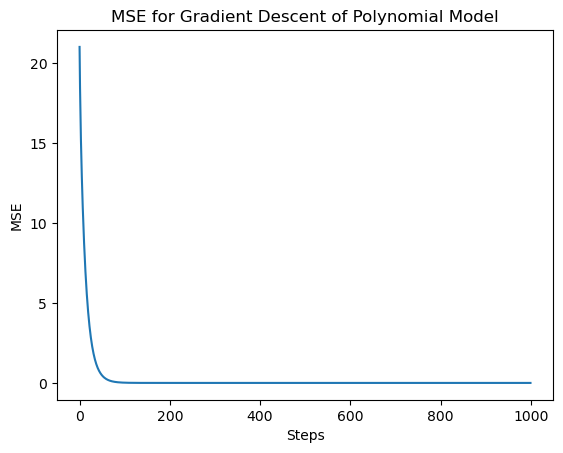

MSE of Polynomial Model using Training Data: 0.002287252157317626
MSE of Polynomial Model using Validation Data: 0.002757269008855522
MSE of Polynomial Model using Testing Data: 0.0026077063303937293


In [16]:
# Second Order Polynomial
from sklearn.preprocessing import PolynomialFeatures
phi_poly_train = PolynomialFeatures(degree=2).fit_transform(X_train)

w, mse_list = gradient_descent(phi_poly_train, y_train, 1000, .02)

# Plot Gradient Descent
plt.plot(mse_list)
plt.title('MSE for Gradient Descent of Polynomial Model')
plt.xlabel('Steps')
plt.ylabel('MSE')
plt.show()

phi_poly_valid = PolynomialFeatures(degree=2).fit_transform(X_val)
phi_poly_test = PolynomialFeatures(degree=2).fit_transform(X_test)

# MSE for training, validation, and testing
print(f'MSE of Polynomial Model using Training Data: {mse(phi_poly_train, w, y_train)}')
print(f'MSE of Polynomial Model using Validation Data: {mse(phi_poly_valid, w, y_val)}')
print(f'MSE of Polynomial Model using Testing Data: {mse(phi_poly_test, w, y_test)}')

While both models have very similar MSE's, the linear model has a sloghtly lower MSE for the validation and testing data, so I would choose the linear model.

# Question 3

In [118]:
import numpy as np
from numpy import genfromtxt

x = genfromtxt('lunch_wait_time (1).csv', delimiter=',')
x = np.reshape(x, (len(x), 1))

In [119]:
# 1)

# d/dtheta = -n/theta + sum(xi)
# 0 = -n/theta + sum(xi)
# n/theta = sum(xi)
# theta = n/sum(xi)
closed_form_theta = len(x)/sum(x)
print(f'Closed-Form Theta: {closed_form_theta}')



Closed-Form Theta: [0.96107641]


In [120]:
# 2)
def f_prime(theta, x, n):
    return -n/theta + sum(x[i] for i in range(n))

theta = np.random.random()
for i in range(1000):
    theta = theta - 0.002 * f_prime(theta, x, len(x))

print(f'Gradient Descent Theta: {theta}')

Gradient Descent Theta: [0.96107641]


In [121]:
# 3)
mean = sum(x[i] for i in range(len(x)))/len(x)

var = sum((x[i]-mean)**2 for i in range(len(x)))/len(x)

sd = np.sqrt(var)

print(f'The mean for this dataset: {mean}')
print(f'The variance for this dataset: {var}')
print(f'The sd for this dataset: {sd}')

The mean for this dataset: [1.0405]
The variance for this dataset: [1.02832975]
The sd for this dataset: [1.01406595]


# Question 4

In [1]:
import numpy as np
from autograd import grad

A = np.array([[1, 1, 1], [4, 2, 1], [9, 3, 1], [16, 4, 1]])
y = np.array([[2], [4], [8], [14]])

In [3]:
# Gradient descent
Q = np.dot(np.transpose(A), A)
z = np.dot(np.transpose(A), y)

def f(w):
    return w.T @ Q @ w - 2 * w.T @ z - y.T @ y

# def f_prime(w):
#     return 2 * np.dot(Q, w) - 2 * z

grad_foo = grad(f)
w = np.zeros((3, 1))

for i in range(500000):
    # print(grad_foo(w))
    w = w - .001 * grad_foo(w)

print(f'Gradient Descent w: {w}')

Gradient Descent w: [[ 1.]
 [-1.]
 [ 2.]]


In [ ]:
# Closed form (used paper to solve)

A = np.array([[1, 1, 1], [4, 2, 1], [9, 3, 1], [16, 4, 1]])
y = np.array([[2], [4], [8], [14]])

Q = A.T.dot(A)
z = A.T.dot(y)

w = np.linalg.inv(Q).dot(z)
print(f'Closed-form w: {w}')

Closed-form w: [[ 1.]
 [-1.]
 [ 2.]]


My closed-form solution:

$$ d/dw (w^TQw - 2w^Tz - y^Ty) = (Q^T + Q)w - 2z $$
$$ 0 = (Q^T + Q)w - 2z $$
$$ 2z = 2Qw $$
$$ z = Qw $$
$$ w = Q^{-1}z $$
